## Introduction

The motivation for this project, is to look at the college statistics of NBA players who both did ever become all stars, and those who didn't, and see how large the difference is. 

I imagine the difference will be very noticeable, but I'm not sure. I'll scrape the names of the players off of basketball-reference.com, and their college stats off of sports-reference.com. 

I kept the draft years for this investigation from 2000-2010 for 3 main reasons: 
<br>(1) Anyone allstar drafted in this era would have been selected by now, 2021.
<br>(2) This was the same era of basketball, before high-volume 3-pt shooting.
<br>(3) A decade (even though it's really 11 years total) is a nice time-frame to work with

In [238]:
import requests # for making standard html requests
from bs4 import BeautifulSoup # magical tool for parsing html data
import json # for parsing data
import pandas as pd # premier library for data organization
import numpy as np 
get_ipython().ast_node_interactivity = 'all' #to print multiple outputs from one cell
from unidecode import unidecode

(a) I make a list of years from 2000 to 2010.
(b) I iterate through that list to scrape the draftboard off of basketball-reference.
(c) I concatenate all those draftboards, called 'draft_year_df,' one on top of each other, into 'draft_df'.


In [2]:
years = np.array([str(x) for x in np.arange(2000, 2011, 1)])
print(years)

['2000' '2001' '2002' '2003' '2004' '2005' '2006' '2007' '2008' '2009'
 '2010']


In [5]:
draft_df = pd.DataFrame([]) #create an empty dataframe that we will populate in this next loop
for year in years: #loop through each year
    draft_html = pd.read_html('https://www.basketball-reference.com/draft/NBA_' + year + '.html')
    #read the html of each url for that draft year on www.basketball-reference.com
    draft_year_df = (draft_html[0]).droplevel(0, axis=1) 
    #the extracted table has two level of pandas df headers, I only want the bottom one
    draft_year_df.insert(0, "Year", year) #manually add year as a column to each draft board
    #print out the top 5 rows for my own viewing
    draft_df = pd.concat([draft_df, draft_year_df], ignore_index=True)
    #concatenate to the bottom of the dataframe "draft_df" the "draft_year_df"
    #so that "draft_df" has every draft board from 2000 to 2010

In [6]:
draft_df.head(32).tail(4)

,Year,Rk,Pk,Tm,Player,College,Yrs,G,MP,PTS,...,3P%,FT%,MP,PTS,TRB,AST,WS,WS/48,BPM,VORP
28,2000,29,29,LAL,Mark Madsen,Stanford,9,453,5335,975,...,.063,.527,11.8,2.2,2.6,0.4,8.2,.074,-4.1,-2.9
29,2000,NaN,NaN,NaN,Round 2,Round 2,NaN,Totals,Totals,Totals,...,Shooting,Shooting,Per Game,Per Game,Per Game,Per Game,Advanced,Advanced,Advanced,Advanced
30,2000,Rk,Pk,Tm,Player,College,Yrs,G,MP,PTS,...,3P%,FT%,MP,PTS,TRB,AST,WS,WS/48,BPM,VORP
31,2000,30,30,LAC,Marko Jarić,NaN,7,447,11246,3193,...,.344,.730,25.2,7.1,2.7,3.6,12.1,.052,-0.7,3.8


(a) From looking at this dataframe, I see these rows, such as index 29 and 30 that shouldn't be there. (b) Basketball-reference uses those rows as headers, so they're part of the table, because of how I scraped it off the site. (c) I'll remove every example of this row from the dataframe.

In [7]:
draft_df = draft_df[(draft_df.Player != 'Round 2') & (draft_df.Player != 'Player')]

Looking at the draftees for whome College is NaN, mostly foreign players, which makes sense

In [8]:
draft_df[draft_df.College.isnull()]

,Year,Rk,Pk,Tm,Player,College,Yrs,G,MP,PTS,...,3P%,FT%,MP,PTS,TRB,AST,WS,WS/48,BPM,VORP
2,2000,3,3,LAC,Darius Miles,NaN,7,446,11730,4507,...,.168,.590,26.3,10.1,4.9,1.9,9.5,.039,-1.0,3.0
15,2000,16,16,SAC,Hedo Türkoğlu,NaN,15,997,26695,11022,...,.384,.784,26.8,11.1,4.0,2.8,63.3,.114,0.9,19.6
22,2000,23,23,UTA,DeShawn Stevenson,NaN,13,824,18396,5930,...,.340,.698,22.3,7.2,2.2,1.6,12.1,.032,-2.7,-3.5
23,2000,24,24,CHI,Dalibor Bagarić,NaN,3,95,973,251,...,.000,.559,10.2,2.6,2.5,0.4,-0.9,-.043,-7.9,-1.5
24,2000,25,25,PHO,Jake Tsakalidis,NaN,7,315,5005,1497,...,.000,.657,15.9,4.8,3.9,0.3,9.9,.095,-3.0,-1.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647,2010,35,35,WAS,Nemanja Bjelica,NaN,7,386,8154,3035,...,.388,.765,21.1,7.9,4.7,1.8,17.5,.103,0.2,4.5
657,2010,45,45,MIN,Paulão Prestes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
660,2010,48,48,MIA,Latavious Williams,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
661,2010,49,49,SAS,Ryan Richards,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Filtering these players out.

In [20]:
draft_df = draft_df[draft_df.College.notnull()] 

(a) Next, I have to find the www.sports-reference.com profile for each player.
(b) For example, Mike Miller in 2000 would be https://www.sports-reference.com/cbb/players/mike-miller-1.html.(c) I have to find that url ending, like 'mike-miller-1.html', for each player

In [21]:
draft_df[draft_df.Player == 'Mike Miller'] 

,Year,Rk,Pk,Tm,Player,College,Yrs,G,MP,PTS,TRB,AST,FG%,3P%,FT%,MP,PTS,TRB,AST,WS,WS/48,BPM,VORP
4,2000,5,5,ORL,Mike Miller,Florida,17,1032,27812,10973,4376,2666,.459,.407,.769,26.9,10.6,4.2,2.6,60.7,.105,0.8,19.8


In [22]:
names = [x.replace(" ", "-").replace(".", "").lower() for x in (list(draft_df.Player.values)) if str(x) != 'nan']
#for all these names, replace spaces between names with a "-"
#And, replace any "." with "", like for A.J. Guyton
#because that's how the urls for basketball-reference work
names = [unidecode(name) for name in names]
#change, for example ã to a, ć to c, or ü to u
names = [name.replace("'", "") for name in names]
#and remove any apostrophes in names, like for Mamadou N'Diaye
np.array(names)[:5], np.array(names)[-5:]

(array(['kenyon-martin', 'stromile-swift', 'marcus-fizer', 'mike-miller',
        'dermarr-johnson'], dtype='<U21'),
 array(['hamady-ndiaye', 'ryan-reid', 'derrick-caracter',
        'stanley-robinson', 'dwayne-collins'], dtype='<U21'))

I'm assigning these values as a column to draft_df

In [24]:
draft_df["UrlName"] = names

<ipython-input-24-384f140c9b1a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  draft_df["UrlName"] = names


In [25]:
draft_df.head()

,Year,Rk,Pk,Tm,Player,...,WS,WS/48,BPM,VORP,UrlName
0,2000,1,1,NJN,Kenyon Martin,...,48.0,.100,0.1,12.1,kenyon-martin
1,2000,2,2,VAN,Stromile Swift,...,21.3,.095,-1.6,1.1,stromile-swift
3,2000,4,4,CHI,Marcus Fizer,...,2.7,.022,-3.7,-2.6,marcus-fizer
4,2000,5,5,ORL,Mike Miller,...,60.7,.105,0.8,19.8,mike-miller
5,2000,6,6,ATL,DerMarr Johnson,...,6.4,.052,-1.6,0.6,dermarr-johnson


(a) An easy way to check if the record is in sports-refernce at all, to get the college stats, is to see if their name followed by '-1', is a valid url extension. (b) This doesn't mean this is there profile, it could be someone else's with the same name who came earlier. (c) Checking if it is the right profile, is something I'll come back to.

In [26]:
def check_url(name):
    try:
        html = pd.read_html('https://www.sports-reference.com/cbb/players/' + name +'-1.html')
        UrlExt = (name +'-1')
    except:
        UrlExt = np.nan
    return(UrlExt)

In [27]:
draft_df["UrlCheck"] = draft_df["UrlName"].apply(check_url)

<ipython-input-27-d741233cfd7d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  draft_df["UrlCheck"] = draft_df["UrlName"].apply(check_url)


In [28]:
draft_df.head()
draft_df.tail()

,Year,Rk,Pk,Tm,Player,...,WS/48,BPM,VORP,UrlName,UrlCheck
0,2000,1,1,NJN,Kenyon Martin,...,.100,0.1,12.1,kenyon-martin,kenyon-martin-1
1,2000,2,2,VAN,Stromile Swift,...,.095,-1.6,1.1,stromile-swift,stromile-swift-1
3,2000,4,4,CHI,Marcus Fizer,...,.022,-3.7,-2.6,marcus-fizer,marcus-fizer-1
4,2000,5,5,ORL,Mike Miller,...,.105,0.8,19.8,mike-miller,mike-miller-1
5,2000,6,6,ATL,DerMarr Johnson,...,.052,-1.6,0.6,dermarr-johnson,dermarr-johnson-1


,Year,Rk,Pk,Tm,Player,...,WS/48,BPM,VORP,UrlName,UrlCheck
668,2010,56,56,MIN,Hamady N'Diaye,...,.013,-7.3,-0.2,hamady-ndiaye,hamady-ndiaye-1
669,2010,57,57,IND,Ryan Reid,...,.142,-2.0,0.0,ryan-reid,ryan-reid-1
670,2010,58,58,LAL,Derrick Caracter,...,.057,-7.1,-0.3,derrick-caracter,derrick-caracter-1
671,2010,59,59,ORL,Stanley Robinson,...,NaN,NaN,NaN,stanley-robinson,stanley-robinson-1
672,2010,60,60,PHO,Dwayne Collins,...,NaN,NaN,NaN,dwayne-collins,dwayne-collins-1


I'll check all the records for which there wasn't a clean url extension

In [29]:
draft_df[draft_df.UrlCheck.isna()]

,Year,Rk,Pk,Tm,Player,...,WS/48,BPM,VORP,UrlName,UrlCheck
47,2000,46,46,TOR,DeeAndre Hulett,...,NaN,NaN,NaN,deeandre-hulett,NaN
70,2001,11,11,BOS,Kedrick Brown,...,.074,-1.1,0.4,kedrick-brown,NaN
140,2002,21,21,POR,Qyntel Woods,...,.032,-2.7,-0.4,qyntel-woods,NaN
163,2002,42,42,MIL,Ronald Murray,...,.037,-2.2,-0.5,ronald-murray,NaN
214,2003,33,33,MIA,Jerome Beasley,...,-.117,-5.2,0.0,jerome-beasley,NaN
275,2004,34,34,ATL,Donta Smith,...,.043,-3.2,-0.2,donta-smith,NaN
525,2008,37,37,MIL,Luc Mbah a Moute,...,.078,-1.5,2.0,luc-mbah-a-moute,NaN
535,2008,47,47,WAS,Henry Walker,...,.079,-1.8,0.2,henry-walker,NaN
572,2009,24,24,DAL,Byron Mullens,...,.008,-4.0,-1.8,byron-mullens,NaN
581,2009,31,31,SAC,Jeff Ayres,...,.131,-2.3,-0.2,jeff-ayres,NaN


First, some of these are just a matter of having different names, which I've looked into, and changed.

In [30]:
draft_df.loc[draft_df.Player == 'Luc Mbah a Moute', 'UrlName'] = "luc-richard-mbah-a-moute"
draft_df.loc[draft_df.Player == 'Luc Mbah a Moute', 'UrlCheck'] = "luc-richard-mbah-a-moute-1"

draft_df.loc[draft_df.Player == 'Henry Walker', 'UrlName'] = "bill-walker"
draft_df.loc[draft_df.Player == 'Henry Walker', 'UrlCheck'] = "bill-walker-1"

draft_df.loc[draft_df.Player == 'Byron Mullens', 'UrlName'] = "bj-mullens"
draft_df.loc[draft_df.Player == 'Byron Mullens', 'UrlCheck'] = "bj-mullens-1"

draft_df.loc[draft_df.Player == 'Jeff Ayres', 'UrlName'] = "jeff-pendergraph"
draft_df.loc[draft_df.Player == 'Jeff Ayres', 'UrlCheck'] = "jeff-pendergraph-1"

draft_df.loc[draft_df.Player == 'Patty Mills', 'UrlName'] = "patrick-mills"
draft_df.loc[draft_df.Player == 'Patty Mills', 'UrlCheck'] = "patrick-mills-1"

draft_df.loc[draft_df.Player == 'Ahman Nivins', 'UrlName'] = "ahmad-nivins"
draft_df.loc[draft_df.Player == 'Ahman Nivins', 'UrlCheck'] = "ahmad-nivins-1"

/Users/isaac/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-30-8a82ef5c2f1d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  draft_df.loc[draft_df.Player == 'Luc Mbah a Moute', 'UrlName'] = "luc-richard-mbah-a-moute"
<ipython-input-30-8a82ef5c2f1d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  draft_df.loc

Second, I'm removing all the Junior College Players from the list, because they're not on Sports Reference.

In [31]:
junior_college_list = ['DeeAndre Hulett', 'Corey Hightower', 'Kedrick Brown', 'Qyntel Woods', 'Donta Smith']

In [32]:
draft_df = draft_df[~draft_df.Player.isin(junior_college_list)]

There are two records that happen to be left, that are neither misspelled names nor Junior Colleges.

In [33]:
draft_df[draft_df.UrlCheck.isna()]

,Year,Rk,Pk,Tm,Player,...,WS/48,BPM,VORP,UrlName,UrlCheck
163,2002,42,42,MIL,Ronald Murray,...,.037,-2.2,-0.5,ronald-murray,NaN
214,2003,33,33,MIA,Jerome Beasley,...,-.117,-5.2,0.0,jerome-beasley,NaN


The third reason for change, is that Shaw is a DII Schoool, and University of North Dakota was DII until 2008. I'll remove those records too.

In [34]:
draft_df = draft_df[(draft_df.Player != 'Ronald Murray') & (draft_df.Player != 'Jerome Beasley')]

(a) Next, I'll look into all the names that are duplicates in Sports Reference. (b) For example, there's a mike-miller-1, and a mike-miller-2. I have to make sure I'm getting the right one. (c) So, I'm creating a list of nonunique names, by checking if the name and '-2' is a valid url extension.

In [35]:
non_unique_names = []
url_names = draft_df.UrlName.values
for i, name in enumerate(url_names[:]):
    try:
        html = pd.read_html('https://www.sports-reference.com/cbb/players/' + name +'-2.html')
        non_unique_names.append(name)
    except:
        pass
            
non_unique_names = np.array(non_unique_names)
non_unique_names

array(['mike-miller', 'mamadou-ndiaye', 'mike-smith', 'jason-hart',
       'ernest-brown', 'jason-richardson', 'rodney-white', 'joe-johnson',
       'michael-bradley', 'jason-collins', 'jeryl-sasser',
       'brandon-armstrong', 'michael-wright', 'earl-watson',
       'ken-johnson', 'maurice-jeffers', 'alvin-jones', 'jay-williams',
       'mike-dunleavy', 'fred-jones', 'frank-williams', 'steve-logan',
       'sam-clancy', 'matt-barnes', 'chris-owens', 'marcus-banks',
       'troy-bell', 'willie-green', 'mo-williams', 'james-jones',
       'tommy-smith', 'ben-gordon', 'devin-harris', 'luke-jackson',
       'kevin-martin', 'david-harrison', 'antonio-burks',
       'bernard-robinson', 'luis-flores', 'rashad-wright',
       'marvin-williams', 'chris-paul', 'joey-graham', 'nate-robinson',
       'david-lee', 'ryan-gomes', 'marcus-williams', 'james-white',
       'paul-davis', 'bobby-jones', 'james-augustine', 'dee-brown',
       'jeff-green', 'corey-brewer', 'sean-williams', 'jason-smith',


(a) These were all the names for which a url extension with both '-1' and '-2' were valid. (b) For each one of these, I'm going to loop through integers 1-9. (c) For the integer for which the last school on that profile page matches the draft board's, that's the integer I'm accepting.

In [36]:
dict_to_use = dict() #this dictionary will pair the player name to the right integer.
for i, name in enumerate(non_unique_names):
    #print("i:", i)
    #print("name:", name)
    try:
        dict_to_use[name] = 0 
        #Set the key in the dictionary to the name.
        #Set the key's value to 0, but I'll change it.
        
        for integer in [1,2,3,4,5,6,7,8,9]:
            #print('integer:', integer)

            player_df = pd.concat(pd.read_html('https://www.sports-reference.com/cbb/players/' + name +'-' + str(integer) + '.html'))
            #Reading the page, and scraping off the first table, of that html for the name-number combo.
            
            if (player_df.iloc[[-1]].School.values[0] == draft_df[draft_df.UrlName == name]["College"].values[0]):            
            
                dict_to_use[name] = integer
                
                #Assign the integer for the url where the schools matched
                #As the value for the key that is the name, in the dictionary
                #if integer > 1:
                    #print(player_df.head(10))
                    #print((player_df.iloc[[-1]].School))
                    #print((draft_df[draft_df.url_name == name]["College"]))  
                break #Once we've found the right integer, we can stop the loop
                
                
    except:
        pass
    #print("-"*80)


I ran the commented out code in my own work to see what was happening, but there's no need to publish it to take up space.

Next, I'm going to isolate all the key:value pairs for which the value is not 1. Then I'll manually check the results and modify draft_df. I'll go from 3 -> 2 -> 0.

In [37]:
a_dict = dict_to_use #Creating an alias, only because a_dict is easier to type
zeros =  dict({(k,v) for k,v in a_dict.items() if int(v) == 0}) #Isolate all 0 values
#Zeros would mean, there was no profile that matched the player's Name and School
twos =  dict({(k,v) for k,v in a_dict.items() if int(v) == 2}) #Isolate all 2 values
threes =  dict({(k,v) for k,v in a_dict.items() if int(v) == 3}) #Isolate all teh 3 values
zeros
twos
threes

{'luis-flores': 0,
 'kevin-martin': 0,
 'jason-thompson': 0,
 'rodney-white': 0,
 'ernest-brown': 0,
 'willie-green': 0}

{'ken-johnson': 2,
 'dee-brown': 2,
 'mike-dunleavy': 2,
 'bobby-jones': 2,
 'james-johnson': 2,
 'gerald-henderson': 2}

{'james-anderson': 3}

In [38]:
draft_df[draft_df.UrlName.isin((threes.keys()))] #Isolate just James Anderson

,Year,Rk,Pk,Tm,Player,...,WS/48,BPM,VORP,UrlName,UrlCheck
630,2010,20,20,SAS,James Anderson,...,.037,-2.7,-0.8,james-anderson,james-anderson-1


"After further review the ruling on the code is confirmed", 'james-anderson-3' is correct.

In [39]:
draft_df.loc[draft_df.UrlName == 'james-anderson', 'UrlCheck'] = 'james-anderson-3'

Next is the Two's. 

In [42]:
draft_df[draft_df.UrlName.isin((twos.keys()))]
draft_df.loc[draft_df.UrlName == 'ken-johnson', 'url_number'] = 2
draft_df.loc[draft_df.UrlName == 'mike-dunleavy', 'url_number'] = 2
draft_df.loc[draft_df.UrlName == 'bobby-jones', 'url_number'] = 2
draft_df.loc[draft_df.UrlName == 'dee-brown', 'url_number'] = 2
draft_df.loc[draft_df.UrlName == 'gerald-henderson', 'url_number'] = 2
draft_df.loc[draft_df.UrlName == 'james-johnson', 'url_number'] = 2
draft_df[draft_df.UrlName.isin((twos.keys()))]

,Year,Rk,Pk,Tm,Player,...,WS/48,BPM,VORP,UrlName,UrlCheck
110,2001,49,49,MIA,Ken Johnson,...,-.002,-6.8,-0.2,ken-johnson,ken-johnson-1
122,2002,3,3,GSW,Mike Dunleavy,...,.103,0.3,15.7,mike-dunleavy,mike-dunleavy-1
401,2006,37,37,MIN,Bobby Jones,...,.060,-4.1,-0.5,bobby-jones,bobby-jones-1
410,2006,46,46,UTA,Dee Brown,...,.008,-3.0,-0.2,dee-brown,dee-brown-1
560,2009,12,12,CHA,Gerald Henderson,...,.063,-1.8,0.6,gerald-henderson,gerald-henderson-1
564,2009,16,16,CHI,James Johnson,...,.087,0.6,9.4,james-johnson,james-johnson-1


,Year,Rk,Pk,Tm,Player,...,BPM,VORP,UrlName,UrlCheck,url_number
110,2001,49,49,MIA,Ken Johnson,...,-6.8,-0.2,ken-johnson,ken-johnson-1,2.0
122,2002,3,3,GSW,Mike Dunleavy,...,0.3,15.7,mike-dunleavy,mike-dunleavy-1,2.0
401,2006,37,37,MIN,Bobby Jones,...,-4.1,-0.5,bobby-jones,bobby-jones-1,2.0
410,2006,46,46,UTA,Dee Brown,...,-3.0,-0.2,dee-brown,dee-brown-1,2.0
560,2009,12,12,CHA,Gerald Henderson,...,-1.8,0.6,gerald-henderson,gerald-henderson-1,2.0
564,2009,16,16,CHI,James Johnson,...,0.6,9.4,james-johnson,james-johnson-1,2.0


In [43]:
draft_df[draft_df.UrlName.isin((twos.keys()))]

,Year,Rk,Pk,Tm,Player,...,BPM,VORP,UrlName,UrlCheck,url_number
110,2001,49,49,MIA,Ken Johnson,...,-6.8,-0.2,ken-johnson,ken-johnson-1,2.0
122,2002,3,3,GSW,Mike Dunleavy,...,0.3,15.7,mike-dunleavy,mike-dunleavy-1,2.0
401,2006,37,37,MIN,Bobby Jones,...,-4.1,-0.5,bobby-jones,bobby-jones-1,2.0
410,2006,46,46,UTA,Dee Brown,...,-3.0,-0.2,dee-brown,dee-brown-1,2.0
560,2009,12,12,CHA,Gerald Henderson,...,-1.8,0.6,gerald-henderson,gerald-henderson-1,2.0
564,2009,16,16,CHI,James Johnson,...,0.6,9.4,james-johnson,james-johnson-1,2.0


"After further review the ruling on the code is confirmed", and the following changes are made.

In [44]:
draft_df.loc[draft_df.UrlName == 'ken-johnson', 'url_number'] = 2
draft_df.loc[draft_df.UrlName == 'mike-dunleavy', 'url_number'] = 2
draft_df.loc[draft_df.UrlName == 'bobby-jones', 'url_number'] = 2
draft_df.loc[draft_df.UrlName == 'dee-brown', 'url_number'] = 2
draft_df.loc[draft_df.UrlName == 'gerald-henderson', 'url_number'] = 2
draft_df.loc[draft_df.UrlName == 'james-johnson', 'url_number'] = 2

These are the most interesting cases, the ones for which no url ending integer could be found.

In [45]:
draft_df[draft_df.UrlName.isin((zeros.keys()))]

,Year,Rk,Pk,Tm,Player,...,BPM,VORP,UrlName,UrlCheck,url_number
53,2000,52,52,MIA,Ernest Brown,...,-18.2,-0.1,ernest-brown,ernest-brown-1,NaN
68,2001,9,9,DET,Rodney White,...,-2.2,-0.2,rodney-white,rodney-white-1,NaN
222,2003,41,41,SEA,Willie Green,...,-2.7,-2.7,willie-green,willie-green-1,NaN
265,2004,26,26,SAC,Kevin Martin,...,1.0,16.1,kevin-martin,kevin-martin-1,NaN
296,2004,55,55,HOU,Luis Flores,...,-4.8,0.0,luis-flores,luis-flores-1,NaN
498,2008,12,12,SAC,Jason Thompson,...,-2.6,-2.4,jason-thompson,jason-thompson-1,NaN


(a) These all fine actually, except for Ernest Brown, who played at Indian Hills Community College. (b) The results are mostly a matter of schools being spelled differently on Sports Reference. (c) For example, the site has 'Charlotte' instead of 'UNC Charlotte' for Rodney White, or 'Detroit' instead of 'Detroit Mercy' for Willig Green.

In [51]:
draft_df = draft_df[-draft_df.UrlName.isin(['ernest-brown'])] #Deleting off Ernest Brown

In [52]:
draft_df.loc[draft_df.UrlName.isin(list(zeros.keys())), 'url_number'] = 1
#This is a more effiecient way of filtering for keys then I did before

The rest of the records, we can give a Url Number of 1

In [53]:
draft_df["url_number"] = draft_df["url_number"].fillna(1)

I also have to check for duplicate names

In [54]:
draft_df.Player[draft_df.Player.duplicated()]

459    Marcus Williams
Name: Player, dtype: object

It's only 'Marcus Williams', which I can manually check.

In [55]:
draft_df[draft_df.Player == 'Marcus Williams']

,Year,Rk,Pk,Tm,Player,...,BPM,VORP,UrlName,UrlCheck,url_number
384,2006,22,22,NJN,Marcus Williams,...,-3.3,-1.0,marcus-williams,marcus-williams-1,1.0
459,2007,33,33,SAS,Marcus Williams,...,-5.4,0.0,marcus-williams,marcus-williams-1,1.0


In [56]:
draft_df.loc[459, 'url_number'] = 2

Once we have all the url extensions on sports-reference for all the draftees, I'll begin scraping off their stats, page by page. First, I scrape a random player's chart off the site (James Anderson). Second, I'm taking the columns from that table. Third, I'm creating a new dataframe with those column names but with no rows, which I will now populate with the players' college stats. It's called stats_df.

In [65]:
player_df = pd.concat(pd.read_html('https://www.sports-reference.com/cbb/players/' + 'james-anderson' +'-' + str(3) + '.html'))
stats_df_columns = player_df[player_df.Season == 'Career'].columns
stats_df = pd.DataFrame(columns=stats_df_columns)
stats_df

,Season,School,Conf,G,GS,...,TOV,PF,PTS,Unnamed: 27,SOS


We'll remake stats_df to have the same columns, but as many rows as draft_df.

Also, we add columns for Player (name), draft Team, and draft Year

In [109]:
stats_df = pd.DataFrame(np.zeros([len(draft_df.index), len(stats_df_columns)])*np.nan)
stats_df.columns = stats_df_columns
stats_df.insert(0, 'Player' ,np.nan)
stats_df.insert(0, 'Team' ,np.nan)
stats_df.insert(0, 'Year' ,np.nan)
stats_df

,Year,Team,Player,Season,School,Conf,G,GS,MP,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Unnamed: 27,SOS
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
471,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
472,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
473,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We'll iterate through each row in draft_df, and populate the corresponding row in stats_df, filling the NaN's. 

In [110]:
for i, index in enumerate(draft_df.index):
    
    #("i:", i)
    #("index:", index)
    row = draft_df.iloc[[i]]
    #(row)
    url_name = row["UrlName"].values[0]
    url_number = row["url_number"].values[0]
    year = row["Year"].values[0]
    team = row["Tm"].values[0]
    player = row["Player"].values[0]
    if True:
#         dict_to_use[name] = "didn't work"
#         for integer in [1,2,3,4,5,6,7,8,9]:
#             print('integer:', integer)

        player_df = pd.concat(pd.read_html('https://www.sports-reference.com/cbb/players/' + url_name +'-' + str(int(url_number)) + '.html'))
        career_df = player_df[player_df.Season == 'Career']
        stats_df.loc[i, 'Player'] = player
        stats_df.loc[i, 'Team'] = team
        stats_df.loc[i, 'Year'] = year
        #stats_df.head()
        #break
        stats_df.loc[i] = stats_df.loc[i].fillna(career_df.iloc[0])

stats_df is all populated, with the correct cumulative college stats for all the draftees

In [111]:
pd.set_option('display.max_columns', None)

In [112]:
stats_df2 = stats_df.copy() #creating a copy in case I missedit

In [117]:
stats_df

,Year,Team,Player,Season,School,Conf,G,GS,MP,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Unnamed: 27,SOS
0,2000,NJN,Kenyon Martin,Career,Cincinnati,NaN,116,97,25,4.4,7.5,0.586,4.4,7.5,0.59,0,0.1,0.222,2.2,3.7,0.581,NaN,NaN,7.5,1.2,1.1,2.5,1.6,2.9,11,NaN,6.65
1,2000,VAN,Stromile Swift,Career,LSU,NaN,50,40,26.6,5.1,9,0.56,4.9,8.4,0.585,0.2,0.7,0.242,3.1,5.1,0.613,NaN,NaN,7,0.7,1.3,2.6,2.5,2.6,13.4,NaN,5.84
2,2000,CHI,Marcus Fizer,Career,Iowa State,NaN,97,91,31.1,7.1,13.9,0.511,6.9,13.2,0.524,0.2,0.7,0.292,4.4,6.3,0.702,NaN,NaN,7.4,1,0.9,0.9,2.3,2.6,18.9,NaN,6.27
3,2000,ORL,Mike Miller,Career,Florida,NaN,65,56,26.7,4.5,9.2,0.483,3.3,5.8,0.565,1.2,3.5,0.345,3.1,4.4,0.718,NaN,NaN,6,2.3,1.2,0.3,2.2,1.9,13.3,NaN,7.07
4,2000,ATL,DerMarr Johnson,Career,Cincinnati,NaN,32,32,27.5,4.4,9.2,0.478,2.8,4.8,0.575,1.6,4.4,0.371,2.2,3,0.737,NaN,NaN,3.8,1.4,1,0.9,1.4,2,12.6,NaN,8.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,2010,MIN,Hamady N'Diaye,Career,Rutgers,NaN,124,85,22.1,2.2,4,0.539,2.2,4,0.542,0,0,0,1.5,2.5,0.592,1.8,3.7,5.5,0.4,0.4,2.9,1.4,2.7,5.8,NaN,6.36
471,2010,IND,Ryan Reid,Career,Florida State,NaN,126,66,20.2,1.9,3.8,0.495,1.9,3.8,0.494,0,0,1,1.2,2,0.604,1.7,2.2,3.9,0.7,0.5,0.6,1.6,1.9,5,NaN,7.66
472,2010,LAL,Derrick Caracter,Career,Overall,NaN,79,36,19.7,4.0,7.1,.563,3.9,6.9,.570,0.1,0.2,.313,2.2,3.6,.628,2.4,3.2,5.6,0.6,0.7,0.8,2.2,3.1,10.3,NaN,5.88
473,2010,ORL,Stanley Robinson,Career,UConn,NaN,126,103,26.2,3.9,8,0.485,3.3,6.3,0.52,0.6,1.7,0.351,1.4,2.2,0.646,2.1,4.1,6.2,1,0.6,1,1.7,1.6,9.8,NaN,7.64


Next, I scrape the table off of 'https://www.basketball-reference.com/allstar/NBA-allstar-career-stats.html', to get the names of all the all stars.

In [114]:
asg = (pd.read_html('https://www.basketball-reference.com/allstar/NBA-allstar-career-stats.html')) #webscrape
asg = (asg[0]).droplevel(0, axis=1) #Drop the superior column headings
asg = asg[asg.Player != 'Player'] #Remove the 'columnn header' in the middle of the table
asg = asg[asg.Player.notnull()] #Reomve the blank row from this url
asg

,Player,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Unnamed: 25_level_1,MP,PTS,TRB,AST
0,Kareem Abdul-Jabbar,18,13,449,105,213,.493,0,1,.000,105,212,.495,41,50,.820,33,84,149,51,6,31,28,57,251,NaN,24.9,13.9,8.3,2.8
1,LeBron James,17,17,473,161,310,.519,38,119,.319,123,191,.644,29,40,.725,13,90,103,98,19,7,55,18,389,NaN,27.8,22.9,6.1,5.8
2,Kobe Bryant,15,15,415,119,238,.500,22,68,.324,97,170,.571,30,38,.789,28,47,75,70,38,6,35,35,290,NaN,27.7,19.3,5.0,4.7
3,Tim Duncan,15,12,311,63,115,.548,1,4,.250,62,111,.559,13,17,.765,38,98,136,31,13,8,31,16,140,NaN,20.7,9.3,9.1,2.1
4,Kevin Garnett,14,11,287,72,141,.511,0,4,.000,72,137,.526,14,16,.875,25,63,88,40,16,11,20,10,158,NaN,20.5,11.3,6.3,2.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468,Kenny Anderson,1,1,16,3,10,.300,0,1,.000,3,9,.333,0,0,NaN,1,3,4,3,0,0,4,2,6,NaN,16.0,6.0,4.0,3.0
469,Andrew Bynum,1,1,6,0,3,.000,0,1,.000,0,2,.000,0,0,NaN,1,2,3,1,1,1,0,0,0,NaN,5.5,0.0,3.0,1.0
470,Julius Randle,1,0,13,2,2,1.000,0,0,NaN,2,2,1.000,0,0,NaN,0,2,2,2,0,0,2,0,4,NaN,13.0,4.0,2.0,2.0
471,Dan Issel,1,1,10,0,3,.000,NaN,NaN,NaN,0,3,.000,0,0,NaN,1,0,1,0,0,0,NaN,0,0,NaN,10.0,0.0,1.0,0.0


In [115]:
asg_names = asg.Player.apply(unidecode) #Appy unidecode to the all star's names.

In [121]:
pd.set_option('display.max_rows', 10)

Next, separate stats_df based on who was ever an all star, and who wasn't.

In [239]:
yes_asg = stats_df[stats_df.Player.apply(unidecode).isin(asg_names)]

In [241]:
yes_asg.head()
yes_asg.tail()

,Year,Team,Player,Season,School,Conf,G,GS,MP,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Unnamed: 27,SOS
0,2000,NJN,Kenyon Martin,Career,Cincinnati,NaN,116,97,25,4.4,7.5,0.586,4.4,7.5,0.59,0,0.1,0.222,2.2,3.7,0.581,NaN,NaN,7.5,1.2,1.1,2.5,1.6,2.9,11,NaN,6.65
16,2000,CHH,Jamaal Magloire,Career,Kentucky,NaN,145,72,19.6,2.7,5.4,0.503,2.7,5.4,0.503,0,0,NaN,1.9,3,0.636,NaN,NaN,5.4,0.4,0.5,1.8,1.7,2.7,7.3,NaN,10.42
33,2000,MIL,Michael Redd,Career,Ohio State,NaN,96,96,34.6,7.3,16.3,0.448,6,12.2,0.491,1.3,4.1,0.319,3.7,5.7,0.649,NaN,NaN,6.2,2.5,1.6,0.1,2.7,1.9,19.6,NaN,8.26
49,2001,BOS,Joe Johnson,Career,Arkansas,NaN,53,41,30.3,5.7,12.2,0.466,4.5,9.3,0.485,1.2,2.9,0.406,2.4,3.2,0.753,NaN,NaN,6.1,2.4,1.7,0.5,2.5,1.7,15,NaN,6.96
56,2001,POR,Zach Randolph,Career,Michigan State,NaN,33,8,19.8,4.2,7.1,0.587,4.2,7.1,0.59,0,0,0,2.4,3.8,0.635,3.1,3.6,6.7,1,0.7,0.7,1.6,1.8,10.8,NaN,9.54


,Year,Team,Player,Season,School,Conf,G,GS,MP,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Unnamed: 27,SOS
390,2009,ATL,Jeff Teague,Career,Wake Forest,NaN,61,52,30.9,5.2,11.2,0.462,3.9,8.2,0.477,1.3,3,0.421,4.8,5.9,0.812,0.5,2.5,3,3,1.9,0.6,3,2.3,16.4,NaN,8.09
422,2010,WAS,John Wall,Career,Kentucky,NaN,37,37,34.8,5.5,11.8,0.461,4.5,8.8,0.509,1,3.1,0.325,4.7,6.3,0.754,0.8,3.5,4.3,6.5,1.8,0.5,4,1.9,16.6,NaN,6.82
426,2010,SAC,DeMarcus Cousins,Career,Kentucky,NaN,38,37,23.5,5.4,9.7,0.558,5.4,9.6,0.565,0,0.2,0.167,4.3,7.1,0.604,4.1,5.8,9.8,1,1,1.8,2.1,3.2,15.1,NaN,6.82
430,2010,UTA,Gordon Hayward,Career,Butler,NaN,69,69,33.1,4.3,9.2,0.47,2.6,4.6,0.569,1.7,4.6,0.369,4.1,4.9,0.824,1.7,5.7,7.4,1.8,1.3,0.9,2,2.1,14.4,NaN,3.57
431,2010,IND,Paul George,Career,Fresno State,NaN,63,63,33.9,5.1,11.4,0.447,3.1,6.5,0.485,1.9,4.9,0.396,3.4,4.2,0.803,1.9,4.8,6.7,2.4,2,0.9,2.7,2.8,15.5,NaN,1.13


In [242]:
non_asg = stats_df[~stats_df.Player.apply(unidecode).isin(asg_names)]

In [243]:
non_asg.head()
non_asg.tail()

,Year,Team,Player,Season,School,Conf,G,GS,MP,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Unnamed: 27,SOS
1,2000,VAN,Stromile Swift,Career,LSU,NaN,50.0,40.0,26.6,5.1,9.0,0.560,4.9,8.4,0.585,0.2,0.7,0.242,3.1,5.1,0.613,NaN,NaN,7.0,0.7,1.3,2.6,2.5,2.6,13.4,NaN,5.84
2,2000,CHI,Marcus Fizer,Career,Iowa State,NaN,97.0,91.0,31.1,7.1,13.9,0.511,6.9,13.2,0.524,0.2,0.7,0.292,4.4,6.3,0.702,NaN,NaN,7.4,1.0,0.9,0.9,2.3,2.6,18.9,NaN,6.27
3,2000,ORL,Mike Miller,Career,Florida,NaN,65.0,56.0,26.7,4.5,9.2,0.483,3.3,5.8,0.565,1.2,3.5,0.345,3.1,4.4,0.718,NaN,NaN,6.0,2.3,1.2,0.3,2.2,1.9,13.3,NaN,7.07
4,2000,ATL,DerMarr Johnson,Career,Cincinnati,NaN,32.0,32.0,27.5,4.4,9.2,0.478,2.8,4.8,0.575,1.6,4.4,0.371,2.2,3.0,0.737,NaN,NaN,3.8,1.4,1.0,0.9,1.4,2.0,12.6,NaN,8.50
5,2000,CHI,Chris Mihm,Career,Texas,NaN,96.0,93.0,29.3,5.2,10.4,0.497,5.1,10.1,0.503,0.1,0.3,0.300,4.2,6.1,0.684,NaN,NaN,9.8,0.6,0.4,2.8,2.3,3.0,14.6,NaN,7.62


,Year,Team,Player,Season,School,Conf,G,GS,MP,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Unnamed: 27,SOS
470,2010,MIN,Hamady N'Diaye,Career,Rutgers,NaN,124.0,85.0,22.1,2.2,4.0,0.539,2.2,4.0,0.542,0.0,0.0,0.000,1.5,2.5,0.592,1.8,3.7,5.5,0.4,0.4,2.9,1.4,2.7,5.8,NaN,6.36
471,2010,IND,Ryan Reid,Career,Florida State,NaN,126.0,66.0,20.2,1.9,3.8,0.495,1.9,3.8,0.494,0.0,0.0,1.000,1.2,2.0,0.604,1.7,2.2,3.9,0.7,0.5,0.6,1.6,1.9,5.0,NaN,7.66
472,2010,LAL,Derrick Caracter,Career,Overall,NaN,79.0,36.0,19.7,4.0,7.1,0.563,3.9,6.9,0.570,0.1,0.2,0.313,2.2,3.6,0.628,2.4,3.2,5.6,0.6,0.7,0.8,2.2,3.1,10.3,NaN,5.88
473,2010,ORL,Stanley Robinson,Career,UConn,NaN,126.0,103.0,26.2,3.9,8.0,0.485,3.3,6.3,0.520,0.6,1.7,0.351,1.4,2.2,0.646,2.1,4.1,6.2,1.0,0.6,1.0,1.7,1.6,9.8,NaN,7.64
474,2010,PHO,Dwayne Collins,Career,Miami (FL),NaN,126.0,99.0,23.6,3.7,6.5,0.565,3.7,6.5,0.565,0.0,0.0,NaN,2.5,4.5,0.563,3.0,4.0,7.0,0.9,0.7,0.7,1.8,2.1,9.9,NaN,7.58


In [179]:
yes_asg_avgs = pd.DataFrame(yes_asg.mean(axis = 0)).iloc[2:] #This iloc[2:] is because
non_asg_avgs = pd.DataFrame(non_asg.mean(axis = 0)).iloc[2:] #We don't need the Year & Conf columns

In [180]:
yes_asg_avgs
non_asg_avgs

,0
G,76.307692
GS,64.307692
MP,29.105769
FG,5.109615
FGA,10.159615
...,...
TOV,2.271154
PF,2.365385
PTS,14.411538
Unnamed: 27,NaN


,0
Unnamed: 27,NaN


For some reason, the columns in non_asg are not floats, so I'll fix that.

In [181]:
for col in non_asg.columns[6:]:
    non_asg[col] = non_asg[col].astype(float)

<ipython-input-181-98a83ebb84c9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_asg[col] = non_asg[col].astype(float)


In [184]:
yes_asg_avgs = pd.DataFrame(yes_asg.mean(axis = 0), columns = ['Yes Asg']).iloc[2:] #This iloc[2:] is because,
non_asg_avgs = pd.DataFrame(non_asg.mean(axis = 0), columns = ['Not Asg']).iloc[2:] #We don't need the Year & Conf columns

In [185]:
yes_asg_avgs
non_asg_avgs

,Yes Asg
G,76.307692
GS,64.307692
MP,29.105769
FG,5.109615
FGA,10.159615
...,...
TOV,2.271154
PF,2.365385
PTS,14.411538
Unnamed: 27,NaN


,Not Asg
G,96.522459
GS,77.522459
MP,28.222695
FG,4.673995
FGA,9.778723
...,...
TOV,2.188889
PF,2.316825
PTS,13.112766
Unnamed: 27,NaN


In [226]:
comparison = pd.concat([yes_asg_avgs, non_asg_avgs], axis=1)

In [227]:
comparison

,Yes Asg,Not Asg
G,76.307692,96.522459
GS,64.307692,77.522459
MP,29.105769,28.222695
FG,5.109615,4.673995
FGA,10.159615,9.778723
FG%,0.509000,0.486151
2P,4.282353,3.782033
2PA,7.984314,7.301655
2P%,0.537353,0.517832
3P,0.801961,0.891253


In [228]:
comparison = comparison.drop(index = 'Unnamed: 27') #Not sure what this is, unneeded.

<AxesSubplot:title={'center':'Games'}>

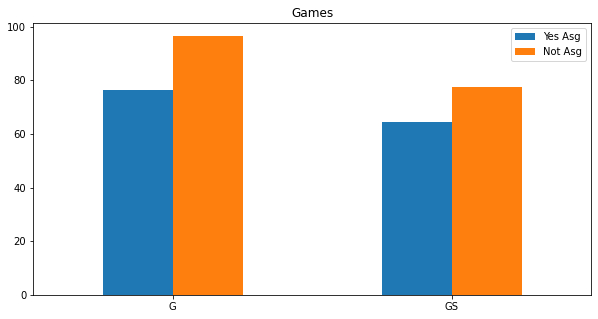

In [232]:
#First, I want to plot the first two rows: Games, Games Started
comparison.iloc[:2].plot.bar(rot=0, figsize = [10,5], title = 'Games')

<AxesSubplot:title={'center':'Minutes Played'}>

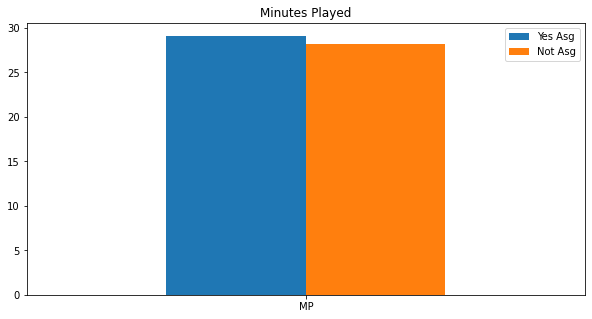

In [235]:
#Next 'Minutes Played' I plot on it's own for completeness, but they differ by less than 1
comparison.iloc[2:3].plot.bar(rot=0, figsize = [10,5], title = 'Minutes Played')

<AxesSubplot:title={'center':'Averages Per Game'}>

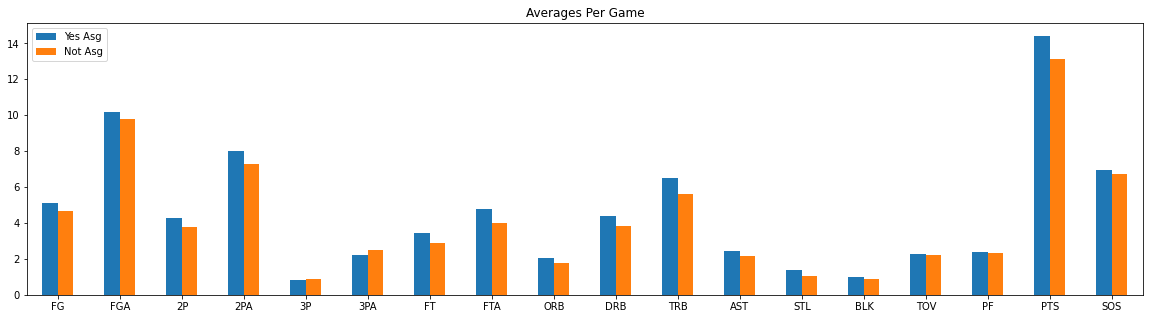

In [236]:
#Next I want the game-average, non-percentages stats in this chart
#Effectively, filtering for where "Yes Asg" values are greater than .8 does the job, in this case
#And I only take the rows after the first three rows, because those are charted above
comparison[comparison["Yes Asg"] > .8].iloc[3:].plot.bar(rot=0, figsize = [20,5], title= 'Averages Per Game')

<AxesSubplot:title={'center':'Shooting Percentages'}>

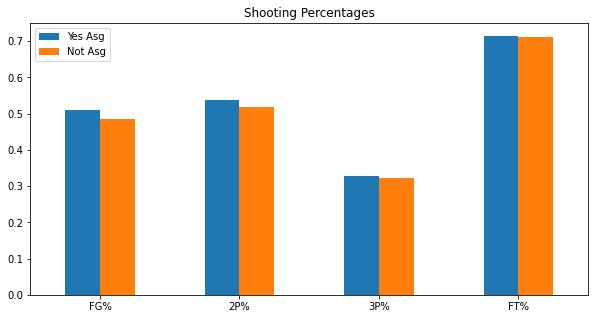

In [237]:
#And lastly, plotting the percentages
comparison[comparison["Yes Asg"] < .8].plot.bar(rot=0, figsize = [10,5], title= 'Shooting Percentages')

Next, I want to look at the differences between the two as a ratio.
What I'm plotting is not exactly "percent change", which is (new-original)/original.
But it is the same idea, so I'll call the numbers pct_difference.

In [247]:
pct_difference = ((comparison["Yes Asg"] - comparison["Not Asg"])/comparison["Not Asg"]) * 100

<AxesSubplot:title={'center':'Percent Differences'}>

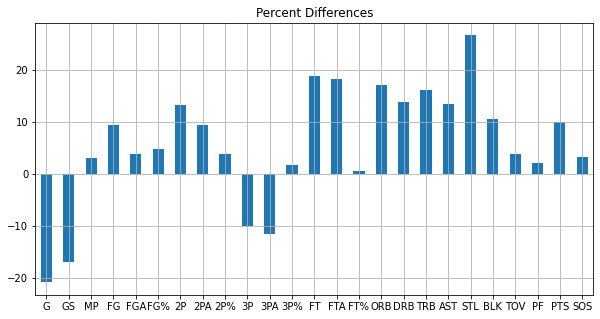

In [250]:
pct_difference.plot.bar(rot=0, figsize = [10,5], title= 'Percent Differences')
plt.grid()

This makes a lot of sense. (1) Future all-stars play less games in college because they can go to the NBA sooner. (2) For all the important stats, (e.g. Rebounds, Assists, Steals, Points), the stats for all stars are 10% greater than for the others. (3) 3P and 3PA being lower also makes sense, because the less effective players usually resort to 3 point shooting. 

## Conclusion

The difference is not as great as I imagined it to be. <br> (1) I thought the difference between allstars and others would be very much noticeable in their raw stats. <br>(2) Some statistics don't even differ by 1 unit, like Total Rebounds or Assists. Points differ by only 1.3 units. <br>(3) However, when I plotted percent differences, and saw the difference of 10-20% across most stats, I noticed the difference was there. 